<a href="https://colab.research.google.com/github/hyunjung930/sesac-web/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이참 설치 및 모듈 설치 방법
json

In [1]:
import urllib.request

In [35]:
url = 'https://dapi.kakao.com/v3/search/book' #OpenAPI 서비스 제공URL
target_param = "target=title" #전달 인자
page_param = "page=2"         #전달 인자
query_in = input("검색 질의:")
query_param = "query="+urllib.parse.quote(query_in) #utf-8로 인코딩, 전달인자

query_str = url+'?'+target_param+'&'+query_param+'&'+page_param #쿼리문자열

print(query_str)

request = urllib.request.Request(query_str) #서비스 요청에 사용할 개체를 생성
request.add_header("Authorization","KakaoAK 본인키") #자신이 발급받은 키로 수정
response = urllib.request.urlopen(request) #웹 서버에 요청
res = response.read().decode('utf-8')
print(res)

검색 질의:파이썬
https://dapi.kakao.com/v3/search/book?target=title&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&page=2


UnicodeEncodeError: ignored

In [34]:
import json
jd = json.loads(res)
print(jd)

NameError: ignored

In [4]:
import pandas as pd
df = pd.json_normalize(jd['documents'])
df.info()

NameError: ignored

In [80]:
# xml 형식
import  urllib.request
url = 'https://openapi.naver.com/v1/search/book.xml' # xml파일로
query_in = input("검색 질의:")
query_param = "query="+urllib.parse.quote(query_in) # utf-8로 인코딩

query_str = url +'?'+query_param

print(query_str)

request = urllib.request.Request(query_str) # 서비스 요청에 사용할 개체를 생성
request.add_header('X-Naver-Client-Id','본인 id')
request.add_header('X-Naver-Client-Secret','본인 Secret')


response = urllib.request.urlopen(request)
res = response.read().decode('utf-8') # utf-8 형식으로 불러옴 
print(res)

검색 질의:파이썬
https://openapi.naver.com/v1/search/book.xml?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC


UnicodeEncodeError: ignored

In [79]:
df = pd.read_xml(res,xpath=".//item")
df

NameError: ignored

In [78]:
import matplotlib.pyplot as plt
df.price.plot()
plt.show()

AttributeError: ignored

In [ ]:
df.description[0]

In [ ]:
des_str = df.description[0]
des_str

In [ ]:
demo_str = "abc 123 cae$ asd# cr"
target_str = ""
for ch in demo_str:
  if ch.isalnum() or ch.isspace():
    target_str = target_str+ch
print(target_str)
target_str = "".join(char for char in demo_str if (char.isalnum() or char.isspace()))
print(target_str)

In [ ]:
filter_str = "".join(char for char in des_str if (char.isalnum() or char.isspace() and char != '...'))
print(filter_str)
words = filter_str.split(' ')
s = pd.Series(words)
s.value_counts()

In [ ]:
#리눅스 명령 sudo
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [12]:
from  wordcloud import WordCloud

In [11]:
src = """
      python interpreter language python python feature love is
      wonderful python interpreter language all language is hard
"""

In [10]:
import matplotlib.font_manager as fm
sf = fm.findSystemFonts()
[f for f in sf if 'Nanum' in f]

[]

In [ ]:
wc = WordCloud('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wc.generate(filter_str)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_ #빈도수가 가장 많은 걸 1

In [ ]:
wc = WordCloud(font_path = '')
wc.generate(src)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_ #빈도수가 가장 많은 걸 1

In [ ]:
# 기존의 웹(인증 키x)들어가서 크롤링함.
# 웹스크랩핑: 웹에서 원하는 부분만 꺼내서 가져오기 
from bs4 import BeautifulSoup
url = 'https://ehpub.co.kr'

response = urllib.request.urlopen(url) #웹 서버에 요청
res = response.read().decode('utf-8')

bre = BeautifulSoup(res,'html.parser')

print(bre.body.text)

wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wc.generate(bre.body.text)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_

train_titanic.csv 파일의 내용을 분석 실습


In [21]:
import pandas as pd


In [22]:
path ='/content/drive/MyDrive/module/train_titanic.csv'
df= pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1. 주어진 자료의 인원, 생존자, 사망자는 몇 명인가?

In [8]:
sur_data = df['Survived']
svc = sur_data.value_counts() # 1 생존자 0 사망자

print(f"인원: {sur_data.count()} 사망자 수:{svc.values[0]} 생존자 수: {svc.values[1]}")

인원: 891 사망자 수:549 생존자 수: 342


2. 생존자와 사망자를 Pie 그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오.


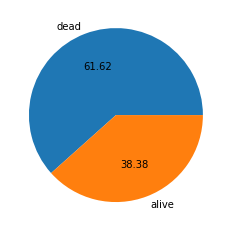

In [37]:
import matplotlib.pyplot as plt
labels=["dead", "alive"]
plt.pie(svc,labels = labels,autopct="%.2f")
plt.show()

3. 결측데이터가 있는 컬럼들을 조사하시오.


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [40]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [41]:
df['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

4. Pclass의 종류별로 분포를 Pie 그래프로 나타내시오.


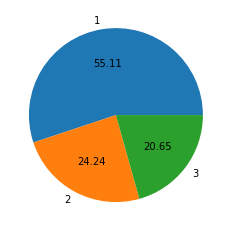

In [42]:
pcl_data = df['Pclass']
pcl = pcl_data.value_counts()

labels=["1","2","3"]
plt.pie(pcl,labels=labels,autopct="%.2f")
plt.show()

<function matplotlib.pyplot.show>

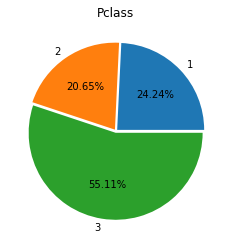

In [43]:
#풀이
dcv = df.Pclass.value_counts().sort_index()  #df['Pclass']
plt.pie(dcv.values,labels = ['1','2','3'],autopct="%.2f%%", explode=[0.02,0.02,0.02]) #%하나가 출력됨
plt.title("Pclass")
plt.show

5. Pclass의 종류별로 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


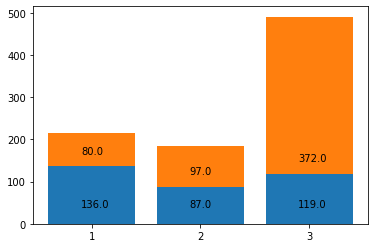

In [44]:
#풀이
import numpy as np
pdata = df.Pclass
cn = len(pdata.unique())
pc_alive_arr = np.zeros(cn)
pc_dead_arr = np.zeros(cn)
for index in range(len(pdata)):
  pi = pdata[index]-1  #Pclass는 1,2,3인데 이를 0,1,2로 변환
  if sur_data[index]==0: #죽은 승객일 때
    pc_dead_arr[pi]+=1
  else:
    pc_alive_arr[pi]+=1
pc_alive_arr, pc_dead_arr

labels = ['1','2','3']
plt.bar(labels,pc_alive_arr)
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr)
for i in range(cn):
  plt.annotate(str(pc_alive_arr[i]),(-0.1+i,40))
  plt.annotate(str(pc_dead_arr[i]),(-0.1+i,pc_alive_arr[i]+30))
plt.show()

6. Name 컬럼에 탑승자를 부르는 호칭을 Mr, Mrs, Miss, Master, Dr, ETC로 나누어 분포를 파이 그래프로 나타내시오.


In [19]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

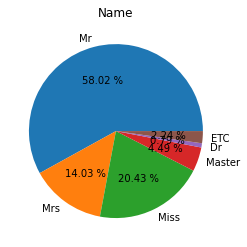

In [45]:
# 풀이
# 호칭 나누기 
names_values =['Mr','Mrs','Miss','Master','Dr','ETC']
def get_name_index(name):
  first,second = name.split(',') # ','를 기준으로 분리
  foos = second.split('.') # '.'을 기준으로 분리
  tn =foos[0].replace(' ','') # 공백 삭제 
  for index,nv in enumerate(names_values):
    if nv == tn:
      return index
  return 5 #index시 5(names_values가 6개로)

n_cnts = np.zeros(6)
for i,name in enumerate(df.Name):
  ni = get_name_index(name)
  n_cnts[ni]+=1

plt.pie(n_cnts,labels=names_values, autopct="%.2f %%")
plt.title("Name")
plt.show()


7. 앞에서 구분한 호칭에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


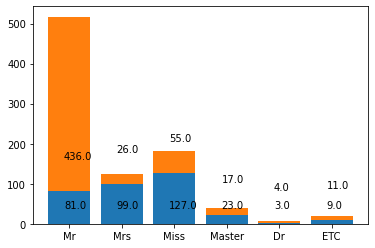

In [46]:
pn_alive_arr = np.zeros(6)
pn_dead_arr = np.zeros(6)
for i,name in enumerate(df.Name):
  ni = get_name_index(name)
  if sur_data[i]==0:
    pn_dead_arr[ni]+=1
  else:
    pn_alive_arr[ni]+=1
plt.bar(names_values, pn_alive_arr)
plt.bar(names_values, pn_dead_arr, bottom = pn_alive_arr)
for i in range(6):
  plt.annotate(str(pn_alive_arr[i]),(-0.1+i,40))
  if pn_alive_arr[i]<40:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i, pn_alive_arr[i]+80))
  else:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i, pn_alive_arr[i]+80))
plt.show()

8. 성별로 분포를 파이 그래프로 나타내시오.


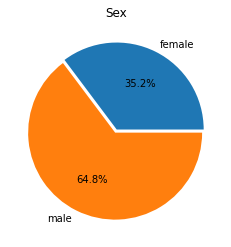

In [47]:
dcv = df.Sex.value_counts().sort_index()  #df['Pclass']
plt.pie(dcv.values,labels = ['female','male'],autopct="%.1f%%", explode=[0.02,0.02]) #%하나가 출력됨
plt.title("Sex")
plt.show()

In [48]:
#풀이
df.Sex.value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [49]:
#풀이
print(type(df.Sex[0]))

<class 'str'>


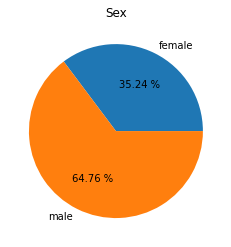

In [50]:
#풀이
sex_values =['female','male']
def get_sex_index(sex):
  if sex == 'female':
    return 0
  return 1

s_cnts = np.zeros(2) #데이터 종류 2개(성별은 f,m)
for i,sex in enumerate(df.Sex):
  si = get_sex_index(sex)
  s_cnts[si]+=1

plt.pie(s_cnts,labels=sex_values, autopct="%.2f %%")
plt.title("Sex")
plt.show()


9. 성별에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


ValueError: ignored

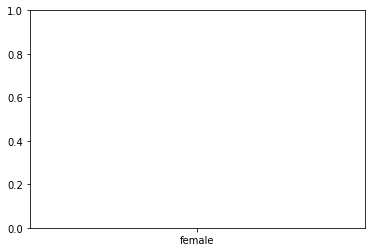

In [51]:
#풀이
import numpy as np
sdata = df.Sex
sn = len(sdata.unique())
ps_alive_arr = np.zeros(cn)
ps_dead_arr = np.zeros(cn)

for index in range(len(pdata)):
  if sdata[index] =='female':
    si = 0
  else:
    si = 1
  if sur_data[index]==0: #죽은 승객일 때
    ps_dead_arr[si]+=1
  else: #생존 승객일 때
    ps_alive_arr[si]+=1

# 그래프(막대)
labels = ['female','male']
plt.bar(labels,ps_alive_arr)
plt.bar(labels,ps_dead_arr,bottom=ps_alive_arr)
for i in range(cn):
  plt.annotate(str(ps_alive_arr[i]),(-0.1+i,40))
  plt.annotate(str(ps_dead_arr[i]),(-0.1+i,ps_alive_arr[i]+30))
plt.show()

10. 나이를 5살 범위로 17단계로(0 ~ 5, 5 ~ 10,...,80~85)로 나누어 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 평균나이로 처리하시오.)


In [52]:
#풀이
#df.Age.isnull().value_counts() -->결측치 177개
# 결측데이터를 평균 나이 처리
mv = df.Age.mean()   #평균
ad = df.Age.fillna(mv)   #결측치를 수정
ad.isnull().value_counts()  #확인

False    891
Name: Age, dtype: int64

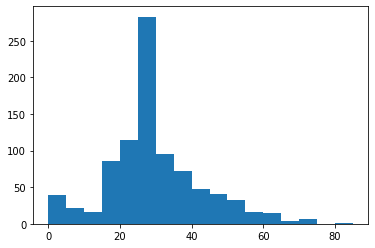

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85])

In [53]:
n, bins, patches = plt.hist(ad,bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
plt.show()
#n #도수값 해당
bins

In [54]:
#풀이
age_values = np.zeros(17)
for i,age in enumerate(ad):
  ai = age//5 #0~4.9999 5로 나누면 몫 0
  ai = int(ai)
  age_values[ai]+=1
age_values
  

array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
        16.,  15.,   4.,   6.,   0.,   1.])

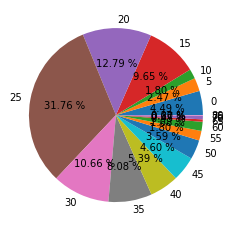

In [55]:
plt.pie(age_values,labels=[ '0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80'], autopct="%.2f %%")
plt.show()

11. 나이를 구분한 단계에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


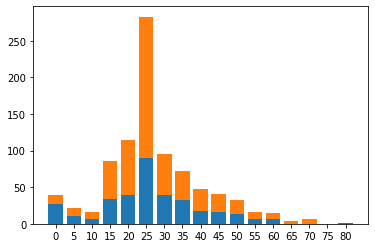

00  ~ 05:  040
05  ~ 10:  022
10  ~ 15:  016
15  ~ 20:  086
20  ~ 25:  114
25  ~ 30:  283
30  ~ 35:  095
35  ~ 40:  072
40  ~ 45:  048
45  ~ 50:  041
50  ~ 55:  032
55  ~ 60:  016
60  ~ 65:  015
65  ~ 70:  004
70  ~ 75:  006
75  ~ 80:  000
80  ~ 85:  001


In [56]:
ps_alive_arr = np.zeros(17)
ps_dead_arr = np.zeros(17)
for index in range(len(ad)):
  ai = ad[index]//5
  ai = int(ai)
  
  if sur_data[index]==0: #죽은 승객일 때
    ps_dead_arr[ai]+=1
  else: #생존 승객일 때
    ps_alive_arr[ai]+=1

labels=['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80']
plt.bar(labels,ps_alive_arr)
plt.bar(labels,ps_dead_arr,bottom=ps_alive_arr)
plt.show()
# 타이타닉을 탄 나이별 인원 수(5단위)
for i in range(17):
  print(f"{i*5:02d}  ~ {(i+1)*5:-02d}:  {age_values[i]:03.0f}")


12. SibSp(형제 자매) 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.


In [57]:
df.SibSp.value_counts()
#df.SibSp.isnull().value_counts() null값 확인

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

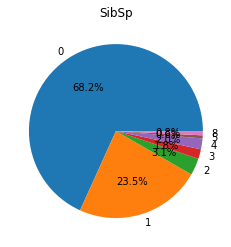

In [58]:
#vc = value count
svc = df.SibSp.value_counts().sort_index()
plt.pie(svc.values,labels = svc.index,autopct="%.1f%%") 
plt.title("SibSp")
plt.show()

13. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


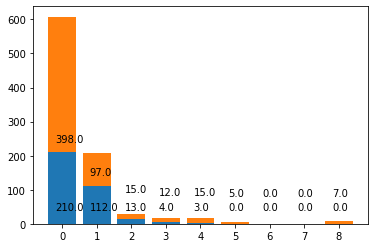

In [59]:
sdata = df.SibSp
sn = 9 #형제자매 수를 인덱스로 사용하기 위해서 0-8까지 9개를 사용
sc_alive_arr = np.zeros(sn)
sc_dead_arr = np.zeros(sn)
for index in range(len(sdata)):
  si = sdata[index] #형제자매수를얻어온다
  if sur_data[index]==0:
    sc_dead_arr[si]+=1
  else:
    sc_alive_arr[si]+=1
  
labels=[str(i) for i in range(9)]
plt.bar(labels,sc_alive_arr)
plt.bar(labels,sc_dead_arr,bottom=sc_alive_arr)
for i in range(sn):
  plt.annotate(str(sc_alive_arr[i]),(-0.2+i, 40))
  if sc_alive_arr[i]<40:
    plt.annotate(str(sc_dead_arr[i]),(-0.2+i, sc_alive_arr[i]+80))
  else:
    plt.annotate(str(sc_dead_arr[i]),(-0.2+i, sc_alive_arr[i]+30))
plt.show()

다시 한 번

In [13]:
a_data = df['Age']
a_data

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
a_data = df.Age
a_data

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
print(type(a_data))

<class 'pandas.core.series.Series'>


In [18]:
a_data.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [23]:
a_data.unique() # unique()는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [25]:
mv = a_data.mean() #평균
print(mv)

29.69911764705882


In [ ]:
a_data.fillna(mv) #결측 데이터 채워넣을 때 fillna를 사용

In [27]:
a_data=a_data.fillna(mv) # 결측 데이터에 평균 값 넣어주기.
a_data.isnull().value_counts() #결측 데이터 확인 #value_counts()는 값별로 데이터의 수를 출력해주는 함수

False    891
Name: Age, dtype: int64

In [28]:
# 타이타닉에 탄 인원 이름 출력
n_data = df.Name
n_data

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
def get_call_name(name):
  _,s = name.split(',')
  foos = s.split('.')
  return foos[0].replace(' ', '')
for name in n_data: # 모든이름에 콤마가 들어가 있는지 확인
 if get_call_name(name) =="Mr":
   print(".")

14. Parch 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.


In [36]:
df.Parch
par = df.Parch.value_counts()
par

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

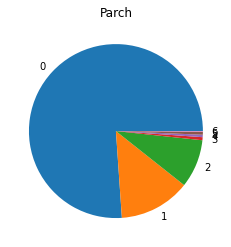

In [69]:
par = df.Parch.value_counts().sort_index()

plt.pie(par.values, labels = ['0','1','2','3','4','5','6'])
plt.title("Parch")
plt.show()


15. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


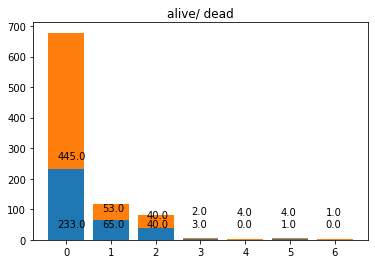

In [74]:
pdata = df.Parch
pn =  len(pdata.unique())
pc_alive_arr = np.zeros(pn)
pc_dead_arr = np.zeros(pn)
for index in range(len(pdata)):
  pi = pdata[index] #형제자매수를얻어온다
  if sur_data[index]==0:
    pc_dead_arr[pi]+=1
  else:
    pc_alive_arr[pi]+=1
  
labels=['0','1','2','3','4','5','6']
plt.bar(labels,pc_alive_arr)
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr)
for i in range(pn):
  plt.annotate(str(pc_alive_arr[i]),(-0.2+i, 40))
  if pc_alive_arr[i]<40:
    plt.annotate(str(pc_dead_arr[i]),(-0.2+i, pc_alive_arr[i]+80))
  else:
    plt.annotate(str(pc_dead_arr[i]),(-0.2+i, pc_alive_arr[i]+30))
plt.title("alive/ dead")
plt.show()

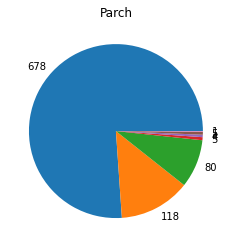

In [76]:
#풀이
pvc = df.Parch.value_counts().sort_index()
plt.pie(par.values, labels = pvc)
plt.title("Parch")
plt.show()

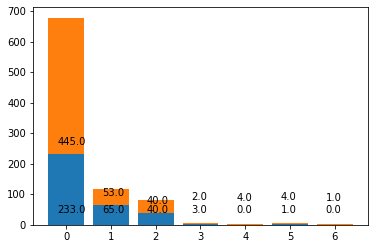

In [77]:
#풀이
pdata = df.Parch
pn = 7  #직계 자손, 조상 수를 인덱스로 사용하기 위해서 0~6까지 7개를 사용
pc_alive_arr = np.zeros(pn)
pc_dead_arr = np.zeros(pn)
for index in range(len(pdata)):
  pi = pdata[index] #직계자손, 조상 수 
  if sur_data[index]==0: #사망 승객
    pc_dead_arr[pi]+=1
  else: #생존 승객
    pc_alive_arr[pi]+=1
  
labels=[str(i) for i in range(pn)] #['0','1','2',,,'6']
plt.bar(labels,pc_alive_arr)
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr)
for i in range(pn):
  plt.annotate(str(pc_alive_arr[i]),(-0.2+i, 40))
  if pc_alive_arr[i]<40:
    plt.annotate(str(pc_dead_arr[i]),(-0.2+i, pc_alive_arr[i]+80))
  else:
    plt.annotate(str(pc_dead_arr[i]),(-0.2+i, pc_alive_arr[i]+30))
plt.show()

16. 승선한 항구(Embarked 컬럼)에 따른 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 'N'으로 마킹하시오.)


In [91]:
e_data = df.Embarked
e_data=e_data.fillna('N') 
#e_data.isnull().value_counts()
e_data

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

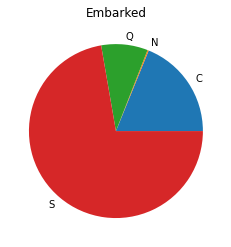

In [97]:
evc = e_data.value_counts().sort_index()
plt.pie(evc.values,labels = evc.index)
plt.title("Embarked")
plt.show()


17. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

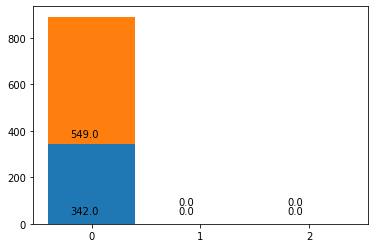

In [101]:
edata = e_data
en = 3  
ec_alive_arr = np.zeros(en)
ec_dead_arr = np.zeros(en)
for index in range(len(edata)):
  ei = edata[index]  
  if sur_data[index]==0: #사망 승객
    ec_dead_arr[pi]+=1
  else: #생존 승객
    ec_alive_arr[pi]+=1
  
labels=[str(i) for i in range(en)] 
plt.bar(labels,ec_alive_arr)
plt.bar(labels,ec_dead_arr,bottom=ec_alive_arr)
for i in range(en):
  plt.annotate(str(ec_alive_arr[i]),(-0.2+i, 40))
  if ec_alive_arr[i]<40:
    plt.annotate(str(ec_dead_arr[i]),(-0.2+i, ec_alive_arr[i]+80))
  else:
    plt.annotate(str(ec_dead_arr[i]),(-0.2+i, ec_alive_arr[i]+30))
plt.show()

In [102]:
#풀이
df.Embarked.isnull().value_counts() # 결측데이터 확인하기

False    889
True       2
Name: Embarked, dtype: int64

In [103]:
edata = df.Embarked.fillna('N')
edata.isnull().value_counts() #복제된 값에 사용되는 것. 결측데이터 N으로 삽입


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

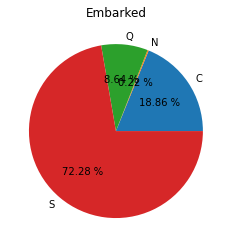

In [106]:
#evc = data.value_counts()
evc = e_data.value_counts().sort_index()

plt.pie(evc.values,labels = evc.index,autopct="%.2f %%")
plt.title("Embarked")
plt.show()

In [107]:
edata.unique() # 값이 어떤 것이 있는지 확인 할 수 있다.
len(edata.unique) #범주 길이

array(['S', 'C', 'Q', 'N'], dtype=object)

In [108]:
evc.index

Index(['C', 'N', 'Q', 'S'], dtype='object')

In [112]:
evc.index # s는 eve[0]
#각 요소의 인덱스를 지정
def get_embarked_index(embarked):
  if embarked == "S":
    return 0
  if embarked == "C":
    return 1
  if embarked == "Q":
    return 2
  if embarked == "N":
    return 3  
#잘 돌아가는지 확인
#i=0
#print(edata[i], get_embarked_index(edata[i]))

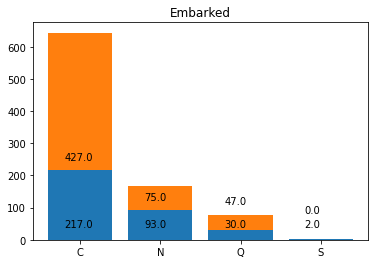

In [115]:
edata.unique() #값의 종류 확인
en = len(edata.unique()) #승선한 항구 수
ec_alive_arr = np.zeros(en)
ec_dead_arr = np.zeros(en)
for index in range(len(edata)):
  ei = get_embarked_index(edata[index]) #embarked의 인덱스 얻어온다
  if sur_data[index]==0: #사망 승객
    ec_dead_arr[ei]+=1
  else: #생존 승객
    ec_alive_arr[ei]+=1
  
labels=evc.index
plt.bar(labels,ec_alive_arr)
plt.bar(labels,ec_dead_arr,bottom=ec_alive_arr)
for i in range(en):
  plt.annotate(str(ec_alive_arr[i]),(-0.2+i, 40))
  if ec_alive_arr[i]<40:
    plt.annotate(str(ec_dead_arr[i]),(-0.2+i, ec_alive_arr[i]+80))
  else:
    plt.annotate(str(ec_dead_arr[i]),(-0.2+i, ec_alive_arr[i]+30))
plt.title('Embarked')
plt.show()

평균, MSE, 벡터,행렬,중심경향성,산포도,상관관계,심슨의 역설,종속성과 독립성, 조건부 확률, 베이즈, 확률 변수, 연속 분포, 정규 분포, 중심 극한 정리, 통계적 가설 검정, p-value, ,신뢰구간, p 해킹, A/B 테스트, 경사하강법, KNN, KMeans, 로지스틱 회귀
